## scikit-learn

## (1) Linear regression
Here we use scikit-learn to solve a linear regression problem
<a id='scikit-learn'></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

Let's first create a dataset:

In [29]:
def f(x, m, b):
    return m * x + b

In [30]:
npoints = 100
dmax = 10

x = np.linspace(0, 99, npoints)
m = 2.0
b = 5.0
y_data = f(x, m, b) + np.random.randn(npoints) * dmax
y_orig = f(x, m, b)

In [31]:
# randomly pick a training set, remaining data will be in the test set
ntrain = int(0.9*npoints)

order = np.random.permutation(npoints)
x_rand = x[order]
y_rand = y_data[order]

x_train = x_rand[:ntrain]    # array indexing [i:j:k] with i=start, j=stop, k=step
y_train = y_rand[:ntrain]
x_test = x_rand[ntrain:]
y_test = y_rand[ntrain:]


# alternative way of picking random samples
#x_train = []
#y_train = []
#
#x_test = x
#y_test = y_data
#
#for i in range(ntrain):
#    index = np.random.randint(0,npoints-i)
#    x_train.append(x_test[index])    
#    x_test = np.delete(x_test,index)
#    y_test = np.delete(y_test,index)
    
#x_train = np.array(x_train)
#y_train = np.array(y_train)
# end alternative way of picking random samples

x_train = x_train[:,np.newaxis]  # x_train needs to be a 2D array, y_train a 1D array
x_test = x_test[:,np.newaxis]
x = x[:,np.newaxis]

#print(len(x_train),len(x_test))
#print(len(y_train),len(y_test))

#print(x_train, x_test)
#print(y_train, y_test)

Let's first plot the data and have a look

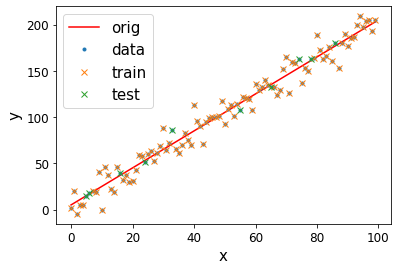

In [32]:
plt.plot(x,y_orig, c='red', label='orig')
plt.plot(x,y_data, '.', label = 'data')
plt.plot(x_train,y_train, 'x', label = 'train')
plt.plot(x_test,y_test, 'x', label = 'test')
plt.legend(fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [33]:
# fit the data with a linear regression model:
# y(w,x) = w0 + w1*x1 + w2*x2 + ... + wp*xp
# here we only fit w0 and w1, since we have 1D data

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)   
m_fit = reg.coef_              # w1
b_fit = reg.intercept_         # w0
print('Fitted slope = %5.3f' % m_fit)
print('Fitted intercept = %5.3f' % b_fit)

Fitted slope = 2.010
Fitted intercept = 4.097


Compute y values predicted by the model and plot

In [34]:
y_pred_all = reg.predict(x)         # y values predicted by the model
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)

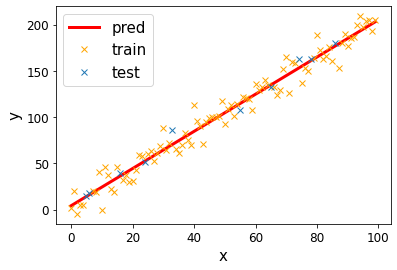

In [35]:
plt.plot(x,y_pred_all, c='red', label='pred', lw=3)
plt.plot(x_train,y_train,'x', c='orange', label = 'train')
plt.plot(x_test,y_test, 'x', label = 'test')
plt.legend(fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('linear_regression-01.pdf', bbox_inches='tight')
plt.show()

In [36]:
# get coefficient of determination: R^2 = 1 - (u/v)
# u = \sum (y_true - y_pred)^2
# v = \sum (y_true - y_true_mean)^2

r2 = reg.score(x_test,y_test)

print('R2 score = %8.5f' % r2)

R2 score =  0.98789


In [37]:
mse_test = mean_squared_error(y_test,y_pred_test)
mse_train = mean_squared_error(y_train,y_pred_train)

mae_test = mean_absolute_error(y_test,y_pred_test)
mae_train = mean_absolute_error(y_train,y_pred_train)

print('MSE test  = %8.4f    MAE test  = %8.4f' % (mse_test,mae_test))
print('MSE train = %8.4f    MAE train = %8.4f' % (mse_train,mae_train))

MSE test  =  42.8796    MAE test  =   4.4650
MSE train = 114.7961    MAE train =   8.4471


## (2) Using the diabetes dataset

In [38]:
from sklearn import datasets

In [39]:
# load diabetes dataset (all data have been mean centered and scaled by the standard deviation times n_samples)

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)


Analysing data for body mass index:



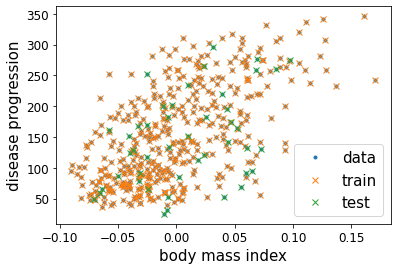

In [40]:
# pick a certain column

xcol=['age','sex','body mass index','average blood pressure','total serum cholesterol','low-density lipoproteins','total cholesterol/HDL','serum triglycerides level','blood surgar level']

col = 2
data_x = diabetes_X[:,col]
data_y = diabetes_y
ndata = len(data_x)

print('\nAnalysing data for %s:\n' % xcol[col])

# randomly assing 90% of the data to the training set and the remaining 10% to the test set

ntrain = int(0.9 * ndata)

order = np.random.permutation(ndata)
x_rand = data_x[order]
y_rand = data_y[order]

x_train = x_rand[:ntrain]
y_train = y_rand[:ntrain]
x_test = x_rand[ntrain:]
y_test = y_rand[ntrain:]

# alternative way of picking random train/test ste
# x_train = []
# y_train = []

# x_test = data_x
# y_test = data_y

# for i in range(ntrain):
#     index = np.random.randint(0,ndata-i)
#     x_train.append(x_test[index])
#     y_train.append(y_test[index])
    
#     x_test = np.delete(x_test,index)
#     y_test = np.delete(y_test,index)
    
# x_train = np.array(x_train)
# y_train = np.array(y_train)

x_train = x_train[:,np.newaxis]  # x_train needs to be a 2D array, y_train a 1D array
x_test = x_test[:,np.newaxis]
data_x = data_x[:,np.newaxis]


# plot the data

plt.plot(data_x,data_y, '.', label = 'data')
plt.plot(x_train,y_train, 'x', label = 'train')
plt.plot(x_test,y_test, 'x', label = 'test')
plt.legend(fontsize=15)
plt.xlabel(xcol[col], fontsize=15)
plt.ylabel('disease progression', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Fitted slope = 978.530
Fitted intercept = 153.712


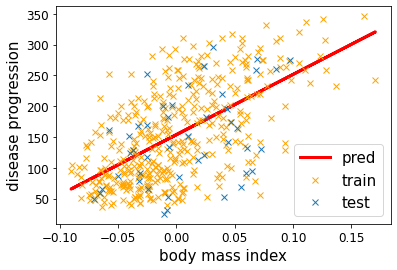

R2 score =  0.11567
MSE test  = 4727.2629    MAE test  =  56.6745
MSE train = 3800.5091    MAE train =  51.2085


In [41]:
# fit the data using linear regression

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)   
m_fit = reg.coef_              # w1
b_fit = reg.intercept_         # w0

print('Fitted slope = %5.3f' % m_fit)
print('Fitted intercept = %5.3f' % b_fit)


# compute values predicted by the model

y_pred_all = reg.predict(data_x)         # y values predicted by the model
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


# plot predicted values together with training and test data

plt.plot(data_x,y_pred_all, c='red', label='pred', lw=3)
plt.plot(x_train,y_train,'x', c='orange', label = 'train')
plt.plot(x_test,y_test, 'x', label = 'test')
plt.legend(fontsize=15)
plt.xlabel(xcol[col], fontsize=15)
plt.ylabel('disease progression', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('diabetes_fit.pdf', bbox_inches='tight')
plt.show()

# get R2, MSE, and MAE

r2 = reg.score(x_test,y_test)
print('R2 score = %8.5f' % r2)

mse_test = mean_squared_error(y_test,y_pred_test)
mse_train = mean_squared_error(y_train,y_pred_train)

mae_test = mean_absolute_error(y_test,y_pred_test)
mae_train = mean_absolute_error(y_train,y_pred_train)

print('MSE test  = %8.4f    MAE test  = %8.4f' % (mse_test,mae_test))
print('MSE train = %8.4f    MAE train = %8.4f' % (mse_train,mae_train))


Analysing data for age:

Fitted slope = 314.034
Fitted intercept = 152.695


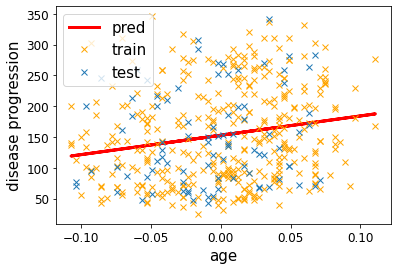

R2 score =  0.01661
MSE test  = 5566.5414    MAE test  =  63.3125
MSE train = 5760.0450    MAE train =  64.9373



Analysing data for sex:

Fitted slope = 99.136
Fitted intercept = 150.022


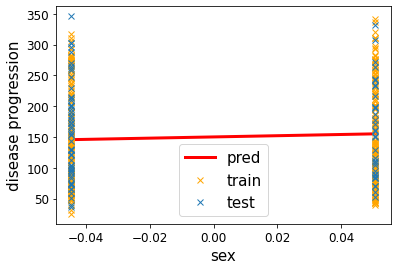

R2 score = -0.02419
MSE test  = 5898.3523    MAE test  =  64.1647
MSE train = 5932.0997    MAE train =  65.8906



Analysing data for body mass index:

Fitted slope = 997.892
Fitted intercept = 152.975


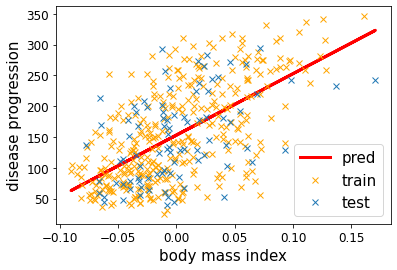

R2 score =  0.17439
MSE test  = 3974.5882    MAE test  =  53.2836
MSE train = 3876.7827    MAE train =  51.2093



Analysing data for average blood pressure:

Fitted slope = 769.961
Fitted intercept = 151.187


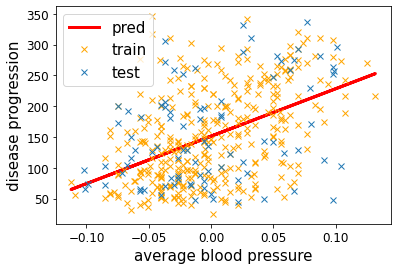

R2 score =  0.11336
MSE test  = 5899.9977    MAE test  =  64.2672
MSE train = 4499.9979    MAE train =  54.9392



Analysing data for total serum cholesterol:

Fitted slope = 297.822
Fitted intercept = 154.251


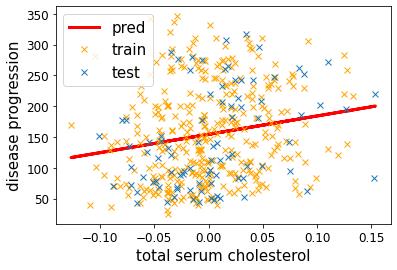

R2 score =  0.07484
MSE test  = 5631.8078    MAE test  =  65.1095
MSE train = 5682.7215    MAE train =  63.8046



Analysing data for low-density lipoproteins:

Fitted slope = 240.903
Fitted intercept = 151.439


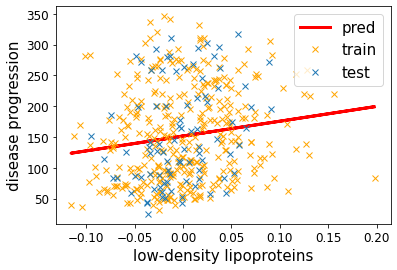

R2 score =  0.04565
MSE test  = 6206.4027    MAE test  =  66.6465
MSE train = 5640.5698    MAE train =  63.9805



Analysing data for total cholesterol/HDL:

Fitted slope = -666.530
Fitted intercept = 154.067


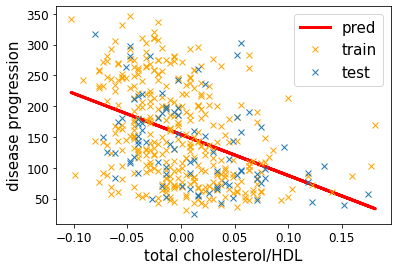

R2 score =  0.13490
MSE test  = 4213.9808    MAE test  =  52.9096
MSE train = 5212.0692    MAE train =  61.0828



Analysing data for serum triglycerides level:

Fitted slope = 714.772
Fitted intercept = 150.420


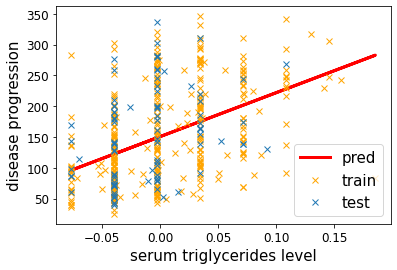

R2 score =  0.09920
MSE test  = 5033.1448    MAE test  =  59.5704
MSE train = 4784.7911    MAE train =  57.0050



Analysing data for blood surgar level:

Fitted slope = 930.019
Fitted intercept = 152.580


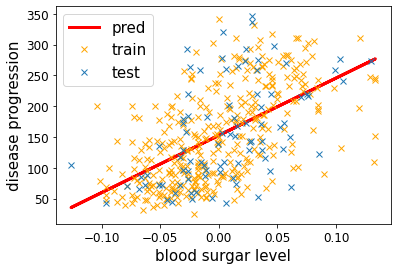

R2 score =  0.23821
MSE test  = 4971.6691    MAE test  =  55.7776
MSE train = 3794.6209    MAE train =  50.3839




In [42]:
# loop over all column

xcol=['age','sex','body mass index','average blood pressure','total serum cholesterol','low-density lipoproteins','total cholesterol/HDL','serum triglycerides level','blood surgar level']
reg = linear_model.LinearRegression()

for i in range(len(xcol)):
    col = i
    data_x = diabetes_X[:,col]
    data_y = diabetes_y
    ndata = len(data_x)
    
    print('\nAnalysing data for %s:\n' % xcol[col])
    
    # randomly assing 90% of the data to the training set and the remaining 10% to the test set

    ntrain = int(0.8 * ndata)

    order = np.random.permutation(ndata)
    x_rand = data_x[order]
    y_rand = data_y[order]

    x_train = x_rand[:ntrain]
    y_train = y_rand[:ntrain] 
    x_test = x_rand[ntrain:]
    y_test = y_rand[ntrain:]

    x_train = x_train[:,np.newaxis]  # x_train needs to be a 2D array, y_train a 1D array
    x_test = x_test[:,np.newaxis]
    data_x = data_x[:,np.newaxis]
    
    # fit the data using linear regression

    
    reg.fit(x_train,y_train)   
    m_fit = reg.coef_              # w1
    b_fit = reg.intercept_         # w0

    print('Fitted slope = %5.3f' % m_fit)
    print('Fitted intercept = %5.3f' % b_fit)


    # compute values predicted by the model

    y_pred_all = reg.predict(data_x)         # y values predicted by the model
    y_pred_test = reg.predict(x_test)
    y_pred_train = reg.predict(x_train)


    # plot predicted values together with training and test data

    plt.plot(data_x,y_pred_all, c='red', label='pred', lw=3)
    plt.plot(x_train,y_train,'x', c='orange', label = 'train')
    plt.plot(x_test,y_test, 'x', label = 'test')
    plt.legend(fontsize=15)
    plt.xlabel(xcol[col], fontsize=15)
    plt.ylabel('disease progression', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    #plt.savefig('diabetes_fit.pdf', bbox_inches='tight')
    plt.show()

    # get R2, MSE, and MAE

    r2 = reg.score(x_test,y_test)
    print('R2 score = %8.5f' % r2)

    mse_test = mean_squared_error(y_test,y_pred_test)
    mse_train = mean_squared_error(y_train,y_pred_train)

    mae_test = mean_absolute_error(y_test,y_pred_test)
    mae_train = mean_absolute_error(y_train,y_pred_train)

    print('MSE test  = %8.4f    MAE test  = %8.4f' % (mse_test,mae_test))
    print('MSE train = %8.4f    MAE train = %8.4f' % (mse_train,mae_train))
    print('\n')


